# pandas(7章)
data-analysis-basic-kadaiリポジトリへpractice_07フォルダを作成し以下格納する。


## 実践7-1
* pandas の lambda を使って以下のデータを加工したカラムCを作成してください。

```
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
```




In [ ]:
import pandas as pd

data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}

# dataをデータフレームに変換する
df = pd.DataFrame(data)

# 加工用の関数を定義する
def calc(count, price):
    return price * count
# データフレームをコピーする
df_ = df.copy()

# A列とB列を掛け合わせたC列を追加する
df_["C"] = df_[["A", "B"]].apply(lambda x: calc(x[0], x[1]), axis=1)
display(df_.head())

,A,B,C
0,1,10,10
1,2,20,40
2,3,30,90
3,4,40,160
4,5,50,250


## 実践7-2
* 以下のデータに対してdescribeを実行してください
```
data = {'A': [1, 2, 3, 4, 5],
        'B': [10, 20, 30, 40, 50]}
```
* 続いて、describeを利用せずに各項目の値（平均、標準偏差、最小値、25パーセンタイル、中央値、75パーセンタイル、最大値）を算出してください。

In [ ]:
import pandas as pd

data = {'A': [1, 2, 3, 4, 5],
      'B': [10, 20, 30, 40, 50]}

df = pd.DataFrame(data)
display(df.head())
display(df.describe())

print(f"平均\n{df.mean()}\n")
print(f"標準偏差\n{df.std()}\n")
print(f"最小値\n{df.min()}\n")
print(f"25パーセンタイル\n{df.quantile(0.25)}\n")
print(f"中央値\n{df.median()}\n")
print(f"75パーセンタイル\n{df.quantile(0.75)}\n")
print(f"最大値\n{df.max()}\n")

,A,B
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


,A,B
count,5.000000,5.000000
mean,3.000000,30.000000
std,1.581139,15.811388
min,1.000000,10.000000
25%,2.000000,20.000000
50%,3.000000,30.000000
75%,4.000000,40.000000
max,5.000000,50.000000


平均
A     3.0
B    30.0
dtype: float64

標準偏差
A     1.581139
B    15.811388
dtype: float64

最小値
A     1
B    10
dtype: int64

25パーセンタイル
A     2.0
B    20.0
Name: 0.25, dtype: float64

中央値
A     3.0
B    30.0
dtype: float64

75パーセンタイル
A     4.0
B    40.0
Name: 0.75, dtype: float64

最大値
A     5
B    50
dtype: int64



## 実践7-3（一部応用）
* まず以下でデータを作成してください。(作成コードに関して、dataframeを作成する過程は非常に実務でも重要ですので参考にしてください)


```
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# 日付範囲を設定
start_date = datetime(2022, 1, 1)
end_date = start_date + timedelta(days=99)

# 日付データを生成
date_range = pd.date_range(start=start_date, end=end_date)

# idとscoreのデータを生成
data = {'day': [],
        'id': [],
        'score': []}

# ランダムなデータを生成
for date in date_range:
    for _ in range(4):  # idごとに4レコード生成
        data['day'].append(date)
        data['id'].append(random.choice(['A', 'B', 'C', 'D']))
        data['score'].append(random.randint(1, 100))

# DataFrameに変換
df = pd.DataFrame(data)

# 結果を表示
print(df)
```
* このデータフレームをIDで集約してください。集約する際、日付はカウント、スコアは平均にしてください。集約は課題で利用したgroupbyを参考にしてください。ポイントは日付とスコアで違う集約方法ということです。



In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# 日付範囲を指定
start_date = datetime(2022, 1, 1)
end_date = start_date + timedelta(days=99)

# 日付データを作成
date_range = pd.date_range(start=start_date, end=end_date)

# idとscoreのデータを生成
data = {'day': [],
        'id': [],
        'score': []}

# ランダムなデータを生成
for date in date_range:
    for _ in range(4): # idごとに4レコード生成
        data['day'].append(date)
        data['id'].append(random.choice(['A', 'B', 'C', 'D']))
        data['score'].append(random.randint(1, 100))

# DataFrameに変換
df = pd.DataFrame(data)

# 結果を表示
print(df)

print(f"日付カウント\n{df.groupby('id')['day'].count()}\n")
print(f" スコア平均\n{df.groupby('id')['score'].mean()}\n")

           day id  score
0   2022-01-01  D     16
1   2022-01-01  D     91
2   2022-01-01  B     61
3   2022-01-01  C     72
4   2022-01-02  B      6
..         ... ..    ...
395 2022-04-09  A     63
396 2022-04-10  B     98
397 2022-04-10  B     84
398 2022-04-10  A     97
399 2022-04-10  D     71

[400 rows x 3 columns]
日付カウント
id
A    103
B    103
C     95
D     99
Name: day, dtype: int64

 スコア平均
id
A    50.116505
B    51.067961
C    52.326316
D    44.868687
Name: score, dtype: float64



## 実践7-4
* 以下の問題1~5をqueryを用いて解いてください。

    * 問題1: 年齢が30歳以上の人のデータを抽出してください。

    * 問題2: 都市が'Tokyo'または'Osaka'の人のデータを抽出してください。

    * 問題3: 給与が500,000円以上で、年齢が40歳未満の人のデータを抽出してください。

    * 問題4: 名前が'A'で始まる人と、給与が700,000円以上の人のデータを抽出してください。（ヒント: startswith）

    * 問題5: 名前の文字数が4文字以下で、年齢が25歳以上35歳以下の人のデータを抽出してください。

    * データは以下を用いてください。


```
# サンプルデータの作成
import pandas as pd
import numpy as np

# 乱数シード値の設定
np.random.seed(123)

# データフレームの作成
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
    'age': np.random.randint(20, 61, size=10),
    'city': ['Tokyo', 'Osaka', 'Nagoya', 'Fukuoka', 'Sapporo', 'Sendai', 'Hiroshima', 'Kobe', 'Kyoto', 'Yokohama'],
    'salary': np.random.randint(300000, 800001, size=10)
}

df = pd.DataFrame(data)
```



In [ ]:
# サンプルデータの作成
import pandas as pd
import numpy as np

# 乱数シード値の設定
np.random.seed(123)

# データフレームの作成
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
    'age': np.random.randint(20, 61, size=10),
    'city': ['Tokyo', 'Osaka', 'Nagoya', 'Fukuoka', 'Sapporo', 'Sendai', 'Hiroshima', 'Kobe', 'Kyoto', 'Yokohama'],
    'salary': np.random.randint(300000, 800001, size=10)
}

df = pd.DataFrame(data)

print("年齢が30歳以上")
display( df.query('age >= 30'))

print("\n都市がTokyoまたはOsaka")
display( df.query('city == ["Tokyo" , "Osaka"]'))

print("\n給与が500,000円以上で年齢が40歳未満")
display( df.query('salary >= 500000 and age < 40'))

print("\n名前が'A'で始まる人と、給与が700,000円以上")
display( df.query('name.str.startswith("A") or salary >= 700000'))

print("\n名前の文字数が4文字以下で、年齢が25歳以上35歳以下")
display( df.query('name.str.len() <= 4 and 25 <= age <= 35'))

年齢が30歳以上


,name,age,city,salary
1,Bob,48,Osaka,464782
2,Charlie,54,Nagoya,496719
3,David,58,Fukuoka,532857
4,Eve,37,Sapporo,710963
5,Frank,39,Sendai,335662
6,Grace,42,Hiroshima,762077
7,Hannah,53,Kobe,527748
8,Ivy,52,Kyoto,708160



都市がTokyoまたはOsaka


,name,age,city,salary
0,Alice,22,Tokyo,371200
1,Bob,48,Osaka,464782



給与が500,000円以上で年齢が40歳未満


,name,age,city,salary
4,Eve,37,Sapporo,710963



名前が'A'で始まる人と、給与が700,000円以上


,name,age,city,salary
0,Alice,22,Tokyo,371200
4,Eve,37,Sapporo,710963
6,Grace,42,Hiroshima,762077
8,Ivy,52,Kyoto,708160



名前の文字数が4文字以下で、年齢が25歳以上35歳以下


,name,age,city,salary
9,Jack,29,Yokohama,430256


## 実践7-5
* 上記の問題をquery以外で実現してください

In [ ]:
# サンプルデータの作成
import pandas as pd
import numpy as np

# 乱数シード値の設定
np.random.seed(123)

# データフレームの作成
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
    'age': np.random.randint(20, 61, size=10),
    'city': ['Tokyo', 'Osaka', 'Nagoya', 'Fukuoka', 'Sapporo', 'Sendai', 'Hiroshima', 'Kobe', 'Kyoto', 'Yokohama'],
    'salary': np.random.randint(300000, 800001, size=10)
}

df = pd.DataFrame(data)

print("年齢が30歳以上")
display( df[df["age"] >= 30])

print("\n都市がTokyoまたはOsaka")
display( df[df["city"].isin(["Tokyo" , "Osaka"]) ])

print("\n給与が500,000円以上で年齢が40歳未満")
display( df[(df["salary"] >= 500000) & (df["age"] < 40)])

print("\n名前が'A'で始まる人と、給与が700,000円以上")
display( df[(df["name"].str.startswith("A")) | (df["salary"] >= 700000)])

print("\n名前の文字数が4文字以下で、年齢が25歳以上35歳以下")
display( df[(df["name"].str.len() <= 4) & (df["age"] >= 25) & (df["age"] <= 35)])

年齢が30歳以上


,name,age,city,salary
1,Bob,48,Osaka,464782
2,Charlie,54,Nagoya,496719
3,David,58,Fukuoka,532857
4,Eve,37,Sapporo,710963
5,Frank,39,Sendai,335662
6,Grace,42,Hiroshima,762077
7,Hannah,53,Kobe,527748
8,Ivy,52,Kyoto,708160



都市がTokyoまたはOsaka


,name,age,city,salary
0,Alice,22,Tokyo,371200
1,Bob,48,Osaka,464782



給与が500,000円以上で年齢が40歳未満


,name,age,city,salary
4,Eve,37,Sapporo,710963



名前が'A'で始まる人と、給与が700,000円以上


,name,age,city,salary
0,Alice,22,Tokyo,371200
4,Eve,37,Sapporo,710963
6,Grace,42,Hiroshima,762077
8,Ivy,52,Kyoto,708160



名前の文字数が4文字以下で、年齢が25歳以上35歳以下


,name,age,city,salary
9,Jack,29,Yokohama,430256


## 実践7-6（応用: 分析の一連のシーケンス）

* データの読み込みと基本操作:
    * 問題: 与えられたCSVファイルをPandasのDataFrameに読み込んでください。最初の5行と最後の5行を表示してください。CSVは過去の演習のファイルを利用してください。
    * 勉強になるポイント:

        * pd.read_csv()を使って外部ファイルをDataFrameに読み込む方法。
        * head()およびtail()を使ってDataFrameの先頭や末尾の行を表示する方法。

* データのクリーニング(先取り範囲のため余力があれば実施する):
    * 問題: DataFrameに欠損値がある場合、欠損値を適切に処理してください。欠損値の数を確認し、欠損値を平均値や中央値で補完してください。
    * 勉強になるポイント:
        * isna()やinfo()を使って欠損値の数を確認する方法。
        * fillna()を使って欠損値を補完する方法。

* データの結合:
    * 問題: 複数のDataFrameを結合してください。例えば、キー列を指定して内部結合や外部結合を行います。
    * 勉強になるポイント:
    * merge()を使って複数のDataFrameを結合する方法。
    * 内部結合や外部結合の違いを理解する方法。
* データの集約:
    * 問題: DataFrameを特定の列でグループ化し、集約関数を適用してください。例えば、groupby()を使って部門ごとの平均売上を計算します。
    * 勉強になるポイント:
        * groupby()を使ってDataFrameをグループ化する方法。
        * 集約関数（平均、合計、最大値、最小値など）を適用する方法。
* データの可視化:
    * 問題: DataFrameのデータを可視化してください。例えば、ヒストグラムや散布図を作成します。
    * 勉強になるポイント:
        * MatplotlibやSeabornを使ってデータの可視化を行う方法。
    * データの分布や相関関係を視覚化する方法。
* データの出力(一部先取り範囲のため実施できるなら進める):
    * 問題: ここまで加工したdataframeを保存してください。例えば、to_csvを用いて保存します。その際、保存した結果にindexを付与しないでください(実務では基本抜きます)。
* データの作成

    * CSVデータは任意です。pythonで作成する場合、参考までに以下のような手順で作成できます。
    * pythonで作成する場合、欠損値はnp.nanです。

```
data = {
    'ID': range(1, 101),
    'Name': [f'Name_{i}' for i in range(1, 101)],
    'Age': np.random.randint(20, 60, size=100),
    'Salary': np.random.randint(30000, 80000, size=100)
}
df = pd.DataFrame(data)
```



    

In [ ]:
# データの読み込み
import pandas as pd
df = pd.read_csv('sample_pandas_6.csv')
# 開始5番目までのデータを表示
display(df.head())
# 末尾5番目までのデータを表示
display(df.tail())

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


,発注日,商品番号,商品名,単価,在庫,注文数
195,2021-08-02,1QJFO8QY,商品サンプル 1QJFO8QY,600,10,42
196,2019-05-28,X0ZE2ZMY,商品サンプル X0ZE2ZMY,90,45,30
197,2015-06-22,48XMJXKO,商品サンプル 48XMJXKO,330,50,36
198,2022-08-29,QRMOGNUU,商品サンプル QRMOGNUU,420,40,48
199,2016-08-07,8T7D5DQA,商品サンプル 8T7D5DQA,120,0,42


In [ ]:
# データのクリーニング
import pandas as pd
import numpy as np

# データの作成
data = {
    'ID': range(1, 11),
    'Name': [f'name_{i}' for i in range(1, 11)],
    'Salary': [200000, 250000, np.nan, np.nan, 400000, np.nan, 500000, 550000, 600000, 650000]
}

df = pd.DataFrame(data)

# 空白の確認
display(df.isna())
print(df.info())

# 空白の置換
df_none_mean = df.fillna(df['Salary'].mean())
print("\n平均で置換")
display(df_none_mean)

df_none_median = df.fillna(df['Salary'].median())
print("\n中央値で置換")
display(df_none_median)

,ID,Name,Salary
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,True
4,False,False,False
5,False,False,True
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10 non-null     int64  
 1   Name    10 non-null     object 
 2   Salary  7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes
None

平均で置換


,ID,Name,Salary
0,1,name_1,200000.0
1,2,name_2,250000.0
2,3,name_3,450000.0
3,4,name_4,450000.0
4,5,name_5,400000.0
5,6,name_6,450000.0
6,7,name_7,500000.0
7,8,name_8,550000.0
8,9,name_9,600000.0
9,10,name_10,650000.0



中央値で置換


,ID,Name,Salary
0,1,name_1,200000.0
1,2,name_2,250000.0
2,3,name_3,500000.0
3,4,name_4,500000.0
4,5,name_5,400000.0
5,6,name_6,500000.0
6,7,name_7,500000.0
7,8,name_8,550000.0
8,9,name_9,600000.0
9,10,name_10,650000.0


In [ ]:
# データの結合
import pandas as pd
df = pd.read_csv('sample_pandas_6.csv')
category_df = pd.read_csv('category.csv')
display(df.head(3))
display(category_df.head(3))

add_category = {
    '商品番号': ['AAAAAAAA', 'BBBBBBBB', 'CCCCCCCC', 'DDDDDDDD'],
    'カテゴリー': ['弁当', '弁当', '弁当', '飲料水']
}
add_category_df = pd.DataFrame(add_category)

new_category_df = pd.concat([category_df, add_category_df], axis=0, ignore_index=True)
display(new_category_df.tail())

# 内部結合
df_inner = pd.merge(df, new_category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
display(df_inner.tail())

# 外部結合
df_outer = pd.merge(df, new_category_df[['商品番号', 'カテゴリー']], how='outer', on='商品番号')
display(df_outer.tail())

,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0


,商品番号,カテゴリー
0,YY4HAAZR,弁当
1,Z4WOOIYV,飲料水
2,1QJFO8QY,弁当


,商品番号,カテゴリー
9,2HSTCDWM,デザート
10,AAAAAAAA,弁当
11,BBBBBBBB,弁当
12,CCCCCCCC,弁当
13,DDDDDDDD,飲料水


,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
195,2019-04-29,2HSTCDWM,商品サンプル 2HSTCDWM,300,10,48,デザート
196,2022-11-10,2HSTCDWM,商品サンプル 2HSTCDWM,300,35,42,デザート
197,2015-02-08,2HSTCDWM,商品サンプル 2HSTCDWM,300,5,0,デザート
198,2019-03-30,2HSTCDWM,商品サンプル 2HSTCDWM,300,40,24,デザート
199,2022-05-15,2HSTCDWM,商品サンプル 2HSTCDWM,300,35,12,デザート


,発注日,商品番号,商品名,単価,在庫,注文数,カテゴリー
199,2022-05-15,2HSTCDWM,商品サンプル 2HSTCDWM,300.0,35.0,12.0,デザート
200,NaN,AAAAAAAA,NaN,NaN,NaN,NaN,弁当
201,NaN,BBBBBBBB,NaN,NaN,NaN,NaN,弁当
202,NaN,CCCCCCCC,NaN,NaN,NaN,NaN,弁当
203,NaN,DDDDDDDD,NaN,NaN,NaN,NaN,飲料水


In [ ]:
# データの集約
import pandas as pd

df = pd.read_csv('sample_pandas_6.csv')
category_df = pd.read_csv('category.csv')

df_inner = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')

print("平均")
display(df_inner.groupby('カテゴリー')['注文数'].mean())

print("\n合計")
display(df_inner.groupby('カテゴリー')['注文数'].sum())

print("\n最小値")
display(df_inner.groupby('カテゴリー')['注文数'].min())

print("\n最大値")
display(df_inner.groupby('カテゴリー')['注文数'].max())

平均


カテゴリー
デザート     26.800000
図書・新聞    33.300000
弁当       34.040816
菓子類      33.473684
雑貨       33.111111
飲料水      24.833333
Name: 注文数, dtype: float64


合計


カテゴリー
デザート      804
図書・新聞     666
弁当       1668
菓子類      1272
雑貨        894
飲料水       894
Name: 注文数, dtype: int64


最小値


カテゴリー
デザート     0
図書・新聞    0
弁当       0
菓子類      0
雑貨       6
飲料水      0
Name: 注文数, dtype: int64


最大値


カテゴリー
デザート     60
図書・新聞    60
弁当       60
菓子類      60
雑貨       60
飲料水      60
Name: 注文数, dtype: int64

In [47]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=079de5f6f6670eee8c93fd5cc614a07a9663cd73996671c1b6e9a02cbc22ee0d
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


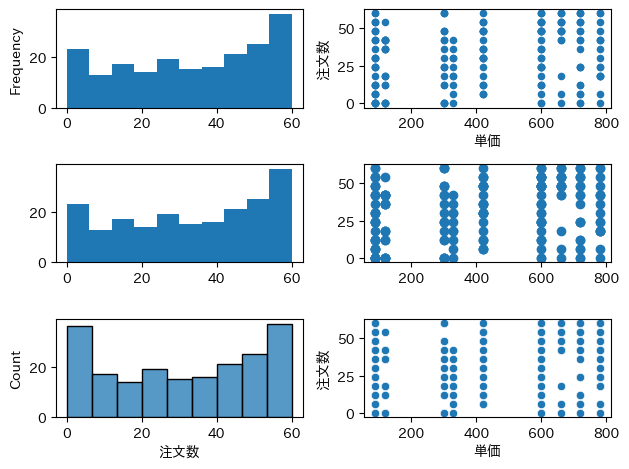

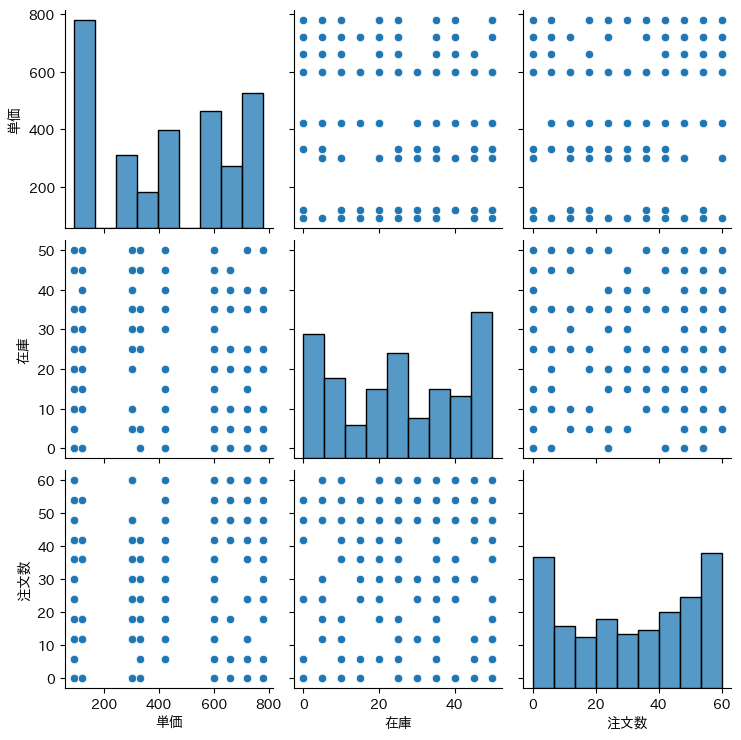

In [ ]:
# データの可視化
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sample_pandas_6.csv')
category_df = pd.read_csv('category.csv')

df_inner = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')

fig, axes = plt.subplots(3, 2, tight_layout=True)

# pandasでの表示
df_inner['注文数'].plot(kind='hist', ax=axes[0,0])
df_inner.plot(kind='scatter', x='単価', y='注文数', ax=axes[0,1])

# matplotlibでの表示
axes[1, 0].hist(df_inner['注文数'])
axes[1, 1].scatter(df_inner['単価'], df_inner['注文数'])

# seabornでの表示
sns.histplot(df_inner['注文数'], ax=axes[2, 0])
sns.scatterplot(x=df_inner['単価'], y=df_inner['注文数'], ax=axes[2, 1])

sns.pairplot(df_inner)
plt.show()



In [ ]:
# csvで保存
import pandas as pd

df = pd.read_csv('sample_pandas_6.csv')
category_df = pd.read_csv('category.csv')

df_inner = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')

df_inner.to_csv('df_inner.csv', index=False, encoding="shift-jis")

## 実践7-7 (numpy, pandas)
* pandas の dataframe を numpy の ndarray へ変換してください。その逆も実施してください。dataframe から numpy への変換は調査してみてください。

In [ ]:
import numpy as np
import pandas as pd

data = {
    'ID': range(1, 101),
    'Name': [f'Name_{i}' for i in range(1, 101)],
    'Age': np.random.randint(20, 60, size=100),
    'Salary': np.random.randint(300000, 800000, size=100)
}
df = pd.DataFrame(data)
columns_name = df.columns

# dataframeをndarrayに変換
df_array = df.to_numpy()
display(df_array)
print(type(df_array))

# ndarrayをdataframeに変換
df_ = pd.DataFrame(data=df_array, columns=columns_name)
display(df_.head())

array([[1, 'Name_1', 39, 631995],
       [2, 'Name_2', 25, 609265],
       [3, 'Name_3', 46, 608815],
       [4, 'Name_4', 24, 794993],
       [5, 'Name_5', 21, 301869],
       [6, 'Name_6', 58, 721710],
       [7, 'Name_7', 37, 364886],
       [8, 'Name_8', 57, 697355],
       [9, 'Name_9', 29, 313135],
       [10, 'Name_10', 32, 595394],
       [11, 'Name_11', 25, 783879],
       [12, 'Name_12', 47, 310722],
       [13, 'Name_13', 41, 619141],
       [14, 'Name_14', 40, 540631],
       [15, 'Name_15', 32, 322468],
       [16, 'Name_16', 50, 650681],
       [17, 'Name_17', 43, 732114],
       [18, 'Name_18', 25, 426509],
       [19, 'Name_19', 33, 760072],
       [20, 'Name_20', 41, 312254],
       [21, 'Name_21', 55, 682773],
       [22, 'Name_22', 31, 704120],
       [23, 'Name_23', 34, 559689],
       [24, 'Name_24', 58, 740320],
       [25, 'Name_25', 54, 414421],
       [26, 'Name_26', 44, 723729],
       [27, 'Name_27', 40, 442412],
       [28, 'Name_28', 58, 640748],
       [29

<class 'numpy.ndarray'>


,ID,Name,Age,Salary
0,1,Name_1,39,631995
1,2,Name_2,25,609265
2,3,Name_3,46,608815
3,4,Name_4,24,794993
4,5,Name_5,21,301869


## 実践7-8 (read_csv)
* pd.read_csvでcsvファイルを読み込む際、カラムの型をdtypeで指定できます。実際に指定して読み込んでください。
* 例: df = pd.read_csv(csv_file, dtype=dtype_dict)
    * 上記のdtype_dictを辞書型で指定する。一部調査してみてください。実務ではdtypeの指定は頻繁に利用します。
* 参考) pandasで指定する一般的な型

    int64: 整数型
    float64: 浮動小数点型
    bool: 真理値型
    object: 文字列型
    datetime64 または timedelta[ns]: 日時型

In [72]:
import pandas as pd

dtype_dict = {1: 'object', 2: 'object', 3: 'int64', 4: 'int64', 5: 'int64'}
df = pd.read_csv('sample_pandas_6.csv', dtype=dtype_dict, parse_dates=[0])

print(df.dtypes)
display(df.head())

発注日     datetime64[ns]
商品番号            object
商品名             object
単価               int64
在庫               int64
注文数              int64
dtype: object


,発注日,商品番号,商品名,単価,在庫,注文数
0,2016-03-06,YY4HAAZR,商品サンプル YY4HAAZR,780,20,24
1,2015-03-27,Z4WOOIYV,商品サンプル Z4WOOIYV,90,45,12
2,2017-05-31,YY4HAAZR,商品サンプル YY4HAAZR,780,10,0
3,2022-10-26,1QJFO8QY,商品サンプル 1QJFO8QY,600,5,24
4,2016-06-10,1QJFO8QY,商品サンプル 1QJFO8QY,600,40,24


## 実践7-9(None)
* pandasでNone/np.nanを含むdataframeを定義してください。
* そのdataframeを利用し、queryとdf[df[””]=...]のどちらでもNone/np.nanを含むレコードのみを抽出してください。(単純に実施してもqueryではフィルタリングできません。調査してみてください。)

In [ ]:
import numpy as np
import pandas as pd

data = {
    'num': [0, 1, None, 3, 4, np.nan, 6, 7, 8, None, np.nan, 10]
}

df = pd.DataFrame(data)
# display(df.head())
display(df[df['num'].isnull()])
display(df.query('num.isnull()'))

,num
2,NaN
5,NaN
9,NaN
10,NaN


,num
2,NaN
5,NaN
9,NaN
10,NaN


## 実践7-10(クロス集計): 応用
* (テキスト外) pandasの機能であるcrosstabを調査してみましょう。本機能で何ができるか確認し説明してください。
    * crosstab: https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
* (応用: 余力があれば)上記のクロス集計結果を実施しSeabornのheatmapで可視化してください。

カテゴリー,デザート,図書・新聞,弁当,菓子類,雑貨,飲料水
年,,,,,,
2015,0.190476,0.095238,0.285714,0.238095,0.095238,0.095238
2016,0.210526,0.052632,0.263158,0.105263,0.210526,0.157895
2017,0.133333,0.000000,0.466667,0.200000,0.133333,0.066667
2018,0.130435,0.130435,0.304348,0.217391,0.130435,0.086957
2019,0.350000,0.100000,0.000000,0.300000,0.150000,0.100000
2020,0.150000,0.150000,0.200000,0.150000,0.050000,0.300000
2021,0.047619,0.095238,0.285714,0.190476,0.190476,0.190476
2022,0.095238,0.190476,0.142857,0.238095,0.047619,0.285714
2023,0.052632,0.105263,0.263158,0.157895,0.052632,0.368421


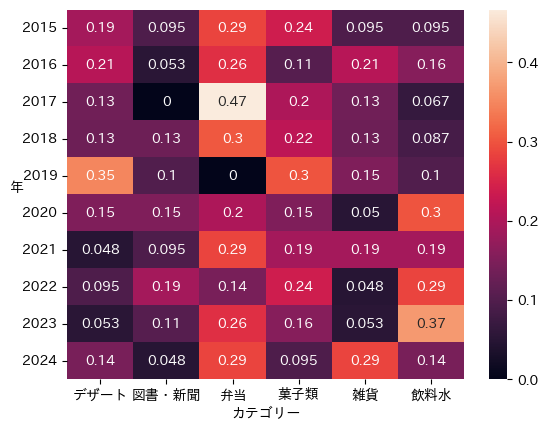

In [67]:
"""
crosstabでは、行と列に使用するデータを指定した上で、それぞれが共通して出現する頻度を集計することができる。
また、全体や列や行それぞれで、標準化を行うこともできる。
"""

import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

df = pd.read_csv('sample_pandas_6.csv', parse_dates=[0])
category_df = pd.read_csv('category.csv')

df_inner = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')
df_inner['年'] = df_inner['発注日'].dt.year

pd_cross = pd.crosstab(df_inner['年'], df_inner['カテゴリー'], normalize='index')
display(pd_cross)

fig, axes = plt.subplots()
sns.heatmap(pd_cross, annot=True)
axes.set_ylabel(axes.get_ylabel(), rotation=0)
axes.set_yticklabels(axes.get_yticklabels(), rotation=0)
plt.show()